# ATP Tennis Data - History Diff + Matchup Percentage



### Results from Best Model

```
Model Score: 0.6906819716407833

ROC/AUC Score: 0.6906426130517523
              precision    recall  f1-score   support

        Loss       0.69      0.68      0.69      7381
         Win       0.69      0.70      0.70      7429

    accuracy                           0.69     14810
   macro avg       0.69      0.69      0.69     14810
weighted avg       0.69      0.69      0.69     14810
```

# Summary of Results

```
Model Score: 0.6896691424713032

ROC/AUC Score: 0.6896461865822082
              precision    recall  f1-score   support

        Loss       0.69      0.68      0.69      7381
         Win       0.69      0.70      0.69      7429

    accuracy                           0.69     14810
   macro avg       0.69      0.69      0.69     14810
weighted avg       0.69      0.69      0.69     14810
```




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, REPORT_FILE, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "ohe-history_diff-matchup_percentage"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-ohe-history5-matchup5.csv'

START_YEAR = 1998
END_YEAR = 2018




In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

Our dataset actually has both historical data as well as matchup data. We will remove the matchup columns from the dataset

In [3]:
import re

def filter_features(data: pd.DataFrame):
    history_columns = [col for col in data.columns if re.search('history', col) and not re.search('diff', col)]
    print(f'Before: data.shape {data.shape}')
    data = data.drop(history_columns, axis=1)

    # drop all columns that doesn't have diff
    matchup_columns = [col for col in data.columns if re.search('matchup', col) and not re.search('percentage', col)]
    data = data.drop(matchup_columns, axis=1)

    print(f'After: data.shape {data.shape}')
    
    return data
    
X_train = filter_features(X_train)
X_test = filter_features(X_test)

Before: data.shape (44429, 5299)
After: data.shape (44429, 5268)
Before: data.shape (14810, 5299)
After: data.shape (14810, 5268)


In [4]:
[col for col in X_train.columns if re.search('matchup|history', col)]

['p1_matchup_games_won_percentage',
 'p1_matchup_sets_won_percentage',
 'p1_matchup_win_percentage',
 'p2_matchup_games_won_percentage',
 'p2_matchup_sets_won_percentage',
 'p2_matchup_win_percentage',
 'p1_history_win_percentage_diff',
 'p1_history_games_won_percentage_diff',
 'p1_history_sets_won_percentage_diff',
 'p1_history_wins_diff',
 'p1_history_losses_diff']

# Logistic Regression

In [5]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6640108035111412

ROC/AUC Score: 0.6640090248563426
              precision    recall  f1-score   support

        Loss       0.66      0.66      0.66      7381
         Win       0.67      0.66      0.66      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4897  2484
Win   2492  4937


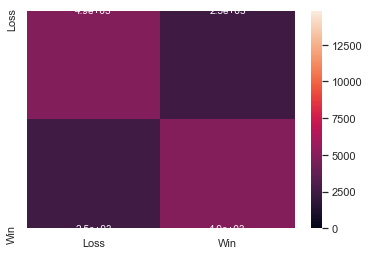

In [6]:
lr.analyze()

In [7]:
# ju.plot_2d(X_test, y_predict_lr)

In [8]:
lr.save()

Saving report: ../reports/summary.csv


# KNN

In [9]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.6083051991897367

ROC/AUC Score: 0.6083139964440318
              precision    recall  f1-score   support

        Loss       0.61      0.61      0.61      7381
         Win       0.61      0.61      0.61      7429

    accuracy                           0.61     14810
   macro avg       0.61      0.61      0.61     14810
weighted avg       0.61      0.61      0.61     14810

      Loss   Win
Loss  4510  2871
Win   2930  4499


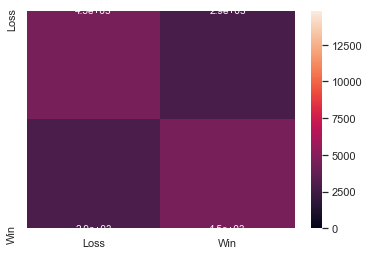

In [10]:
knn.analyze()

In [11]:
# ju.plot_2d(X_test, y_predict_knn)

In [12]:
knn.save()

Saving report: ../reports/summary.csv


# Decision Tree

In [13]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.6035786630654962

ROC/AUC Score: 0.603584346846393
              precision    recall  f1-score   support

        Loss       0.60      0.61      0.60      7381
         Win       0.61      0.60      0.60      7429

    accuracy                           0.60     14810
   macro avg       0.60      0.60      0.60     14810
weighted avg       0.60      0.60      0.60     14810

      Loss   Win
Loss  4468  2913
Win   2958  4471


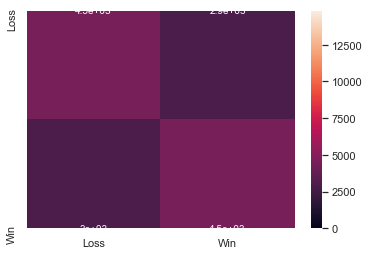

In [14]:
dt.analyze()

In [15]:
# ju.plot_2d(X_test, y_predict_dt)

In [16]:
dt.save()

Saving report: ../reports/summary.csv


# Random Forest Classifier

In [17]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.637204591492235

ROC/AUC Score: 0.6374373514239455
              precision    recall  f1-score   support

        Loss       0.62      0.71      0.66      7381
         Win       0.66      0.57      0.61      7429

    accuracy                           0.64     14810
   macro avg       0.64      0.64      0.64     14810
weighted avg       0.64      0.64      0.64     14810

      Loss   Win
Loss  5235  2146
Win   3227  4202


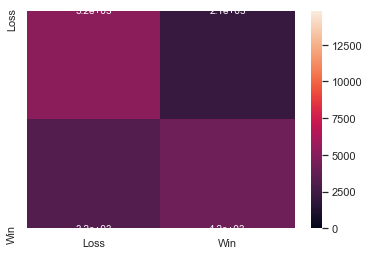

In [18]:
rf.analyze()

In [19]:
# ju.plot_2d(X_test, y_predict_rf)

In [20]:
rf.save()

Saving report: ../reports/summary.csv


# Gradient Boosting

In [21]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3661           10.20m
         2           1.3495            9.98m
         3           1.3353           10.05m
         4           1.3230           10.01m
         5           1.3124            9.88m
         6           1.3032            9.78m
         7           1.2958            9.60m
         8           1.2880            9.44m
         9           1.2814            9.32m
        10           1.2754            9.21m
        20           1.2276            8.15m
        30           1.2016            7.18m
        40           1.1801            6.06m
        50           1.1708            4.98m
        60           1.1646            3.95m
        70           1.1601            2.93m
        80           1.1543            1.94m


Model Score: 0.6896691424713032

ROC/AUC Score: 0.6896461865822082
              precision    recall  f1-score   support

        Loss       0.69      0.68      0.69      7381
         Win       0.69      0.70      0.69      7429

    accuracy                           0.69     14810
   macro avg       0.69      0.69      0.69     14810
weighted avg       0.69      0.69      0.69     14810

      Loss   Win
Loss  5038  2343
Win   2253  5176


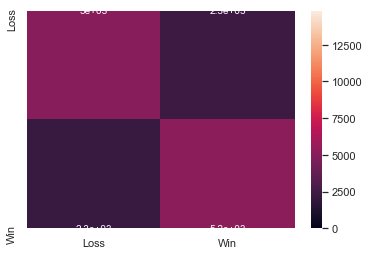

In [22]:
gb.analyze()

In [23]:
# ju.plot_2d(X_test, y_predict_gb)

In [24]:
gb.save()

Saving report: ../reports/summary.csv


# AdaBoost

In [25]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.6681296421336934

ROC/AUC Score: 0.668101426558085
              precision    recall  f1-score   support

        Loss       0.67      0.66      0.66      7381
         Win       0.67      0.68      0.67      7429

    accuracy                           0.67     14810
   macro avg       0.67      0.67      0.67     14810
weighted avg       0.67      0.67      0.67     14810

      Loss   Win
Loss  4867  2514
Win   2401  5028


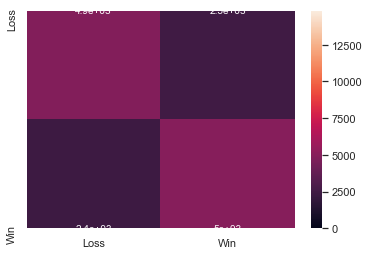

In [26]:
ab.analyze()

In [27]:
# ju.plot_2d(X_test, y_predict_ab)

In [28]:
ab.save()

Saving report: ../reports/summary.csv


# Results

In [37]:
report = pd.read_csv(REPORT_FILE)
report.tail(6)

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min
114,LogisticRegression,ohe-history_diff-matchup_percentage,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.664011,0.664009,"{""0"": {""0"": 4897, ""1"": 2492}, ""1"": {""0"": 2484,...","{""Loss"": {""precision"": 0.6627419136554338, ""re...",../models/logisticregression-1998-2018-ohe-his...,0.0,0.0,0.0
115,KNeighborsClassifier,ohe-history_diff-matchup_percentage,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.608305,0.608314,"{""0"": {""0"": 4510, ""1"": 2930}, ""1"": {""0"": 2871,...","{""Loss"": {""precision"": 0.6061827956989247, ""re...",../models/kneighborsclassifier-1998-2018-ohe-h...,0.0,0.0,0.0
116,DecisionTreeClassifier,ohe-history_diff-matchup_percentage,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.603579,0.603584,"{""0"": {""0"": 4468, ""1"": 2958}, ""1"": {""0"": 2913,...","{""Loss"": {""precision"": 0.6016698087799623, ""re...",../models/decisiontreeclassifier-1998-2018-ohe...,0.0,0.0,0.0
117,RandomForestClassifier,ohe-history_diff-matchup_percentage,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.637205,0.637437,"{""0"": {""0"": 5235, ""1"": 3227}, ""1"": {""0"": 2146,...","{""Loss"": {""precision"": 0.6186480737414323, ""re...",../models/randomforestclassifier-1998-2018-ohe...,0.0,0.0,0.0
118,GradientBoostingClassifier,ohe-history_diff-matchup_percentage,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.689669,0.689646,"{""0"": {""0"": 5038, ""1"": 2253}, ""1"": {""0"": 2343,...","{""Loss"": {""precision"": 0.6909888904128377, ""re...",../models/gradientboostingclassifier-1998-2018...,0.0,8.0,8.0
119,AdaBoostClassifier,ohe-history_diff-matchup_percentage,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.668130,0.668101,"{""0"": {""0"": 4867, ""1"": 2401}, ""1"": {""0"": 2514,...","{""Loss"": {""precision"": 0.6696477710511832, ""re...",../models/adaboostclassifier-1998-2018-ohe-his...,0.0,1.0,1.0


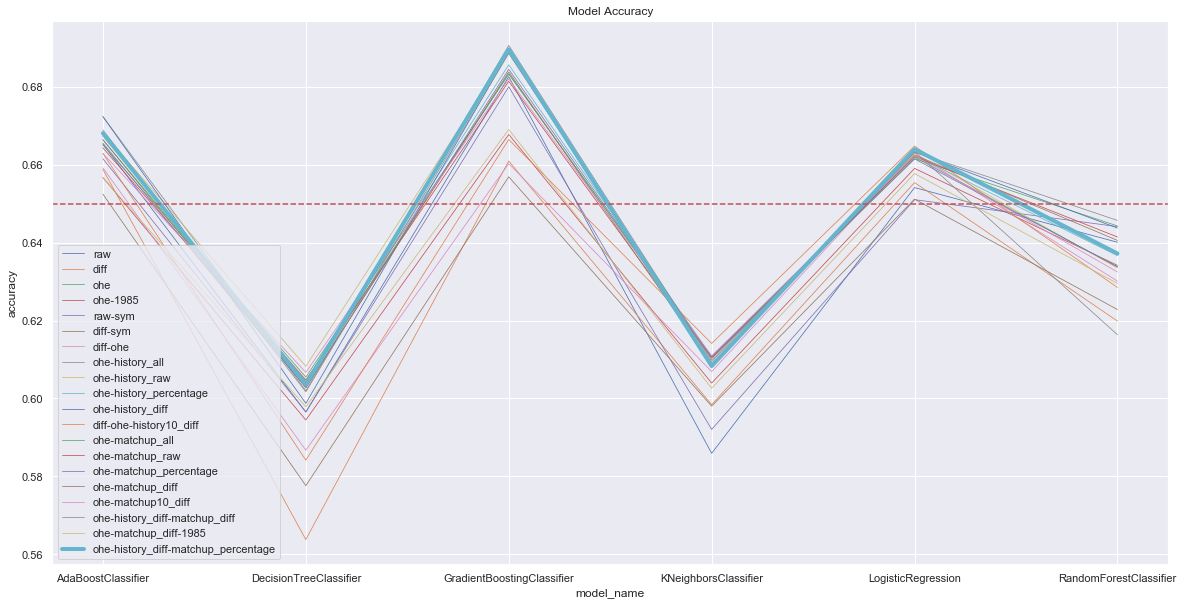

In [30]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

Best Model: GradientBoostingClassifier


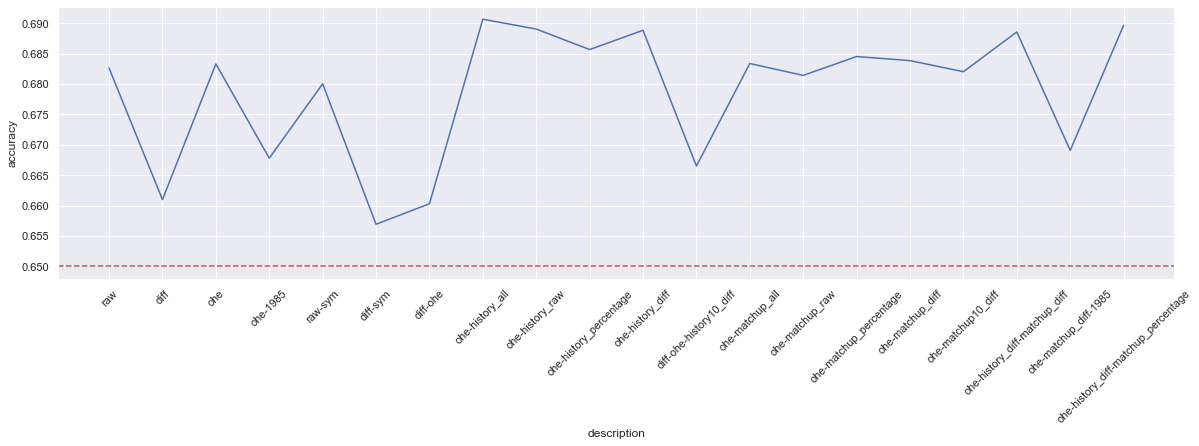

In [31]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')

dt_report = report[(report.model_name == best_model)]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False)
_ = a.axhline(0.65, ls='--', color='r')
_ = a.set_label(f"{best_model} Accuracy")
_ = plt.xticks(rotation=45)


In [32]:

current_report = report[(report.model_name == best_model) &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


In [38]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

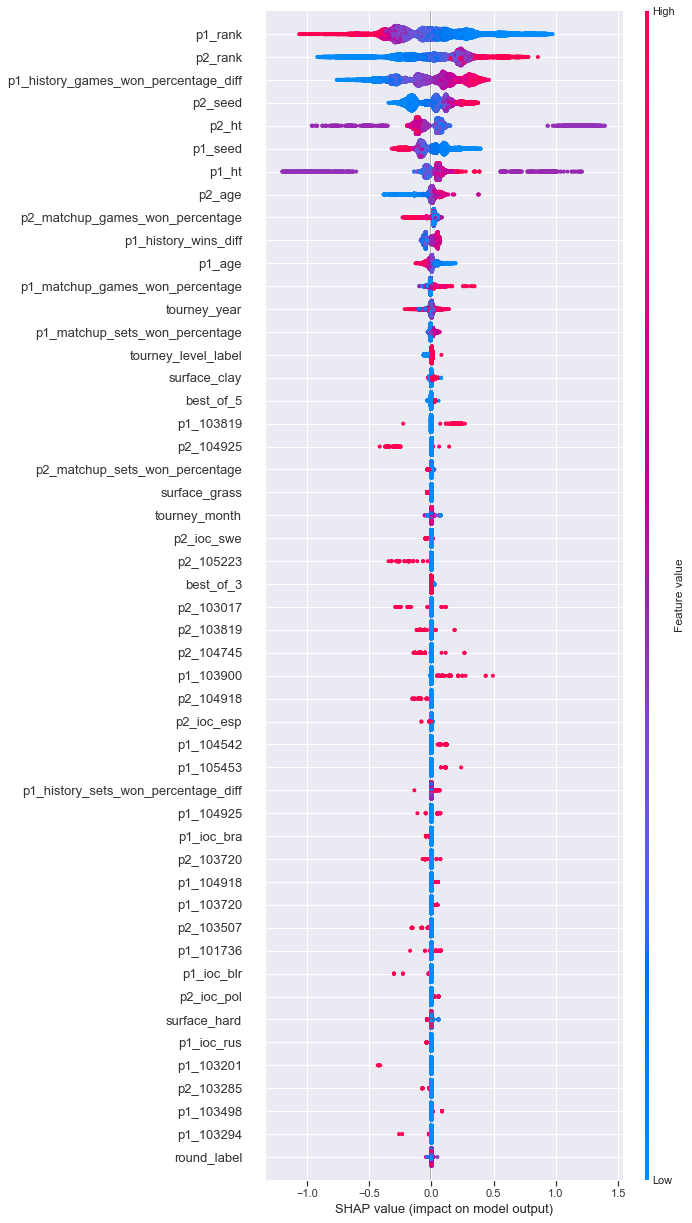

In [39]:
shap.summary_plot(shap_values, X_test, max_display=50)

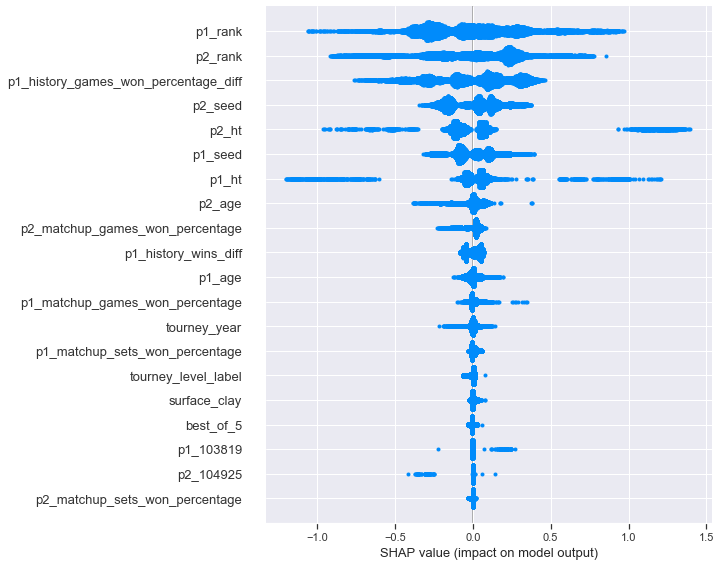

In [40]:
shap.summary_plot(shap_values, feature_names=X_test.columns, title="Feature Importance")

In [41]:
print(f'Last Finished: {datetime.now().strftime("%Y-%m-%d %H:%M")}')

Last Finished: 2019-10-21 11:50
